In [92]:
import pandas as pd
import numpy as np

In [93]:
df = pd.read_csv('train.csv')

###  Характеристика данных
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [94]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Так как у нас много переменных с пропущенными значениями, создадим отдельный датасет и изучим его подробно

In [95]:
gaps = df.isnull().sum()>0
gaps_m = df[df.columns[gaps]]


In [96]:
gaps_m.describe(include='all')

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
count,1201.000000,91,1452,1452.000000,1423,1423,1422,1423,1422,1459,770,1379,1379.000000,1379,1379,1379,7,281,54
unique,NaN,2,4,NaN,4,4,4,6,6,5,5,6,NaN,3,5,5,3,4,4
top,NaN,Grvl,None,NaN,TA,TA,No,Unf,Unf,SBrkr,Gd,Attchd,NaN,Unf,TA,TA,Gd,MnPrv,Shed
freq,NaN,50,864,NaN,649,1311,953,430,1256,1334,380,870,NaN,605,1311,1326,3,157,49
mean,70.049958,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978.506164,NaN,NaN,NaN,NaN,NaN,NaN
std,24.284752,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.689725,NaN,NaN,NaN,NaN,NaN,NaN
min,21.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,59.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,69.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,80.000000,NaN,NaN,166.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN


Исключим из анализа переменные, в которых очень мало значений 'alley', 'FireplaceQu','poolQC', 'Fence', MiscFeature'

Используем медианное значение для переменной LotFrontage, так как по показателям можно предположить, что распределение близко к нормальному. 

In [97]:
med_LF=df['LotFrontage'].median()
df['LotFrontage']=df['LotFrontage'].fillna(med_LF)

Для переменной MasVnrArea используем среднее значение, потому что большинство значений равно нулю и медиану использовать не очень эффективно, так как разброс показателей выше 3 квартиля очень большой

In [98]:
n_MVR=df['MasVnrArea'].mean()
df['MasVnrArea']=df['MasVnrArea'].fillna(n_MVR)

Год постройки гаража заполним модой. 

In [99]:
mode_gyb=df['GarageYrBlt'].mode()[0]
df['GarageYrBlt']=df['GarageYrBlt'].fillna(mode_gyb)


In [100]:
gaps_m.columns.to_list()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [101]:
cat_gaps = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical',
 'GarageType','GarageFinish','GarageQual','GarageCond']
for i in cat_gaps:
    df[i]=df[i].fillna(df[i].mode()[0])




In [102]:
del df['Alley']
del df['FireplaceQu']
del df['PoolQC']
del df['Fence']
del df['MiscFeature']

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Обработаем дублированные строки

In [104]:
duplicates = df.duplicated()
duplicates_df = df[duplicates]
df = df.drop_duplicates()

### Разведочный анализ

<AxesSubplot:ylabel='Frequency'>

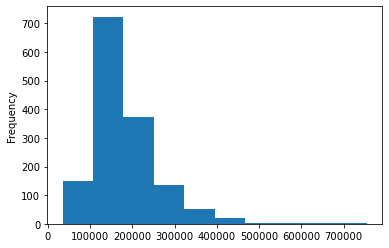

In [105]:
df['SalePrice'].plot.hist()

In [106]:
from scipy.stats import kstest, norm
ks_statistic, p_value = kstest(df['SalePrice'], 'norm')
print(ks_statistic, p_value)

1.0 0.0


Обработаем выбросы значений 

In [107]:
from scipy import stats
z = np.abs(stats.zscore(df['SalePrice']))
# Установка порогового значения Z-score
threshold = 3
# Выявление выбросов на основе Z-score
outliers = df['SalePrice'][z > threshold]
# Замена выбросов медианным значением
df.loc[z > threshold, 'SalePrice'] = df['SalePrice'].median()


In [108]:
spearman_correlation = df.corr(method='spearman')
print(spearman_correlation)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.019226    -0.032951 -0.005364    -0.028771   
MSSubClass     0.019226    1.000000    -0.280102 -0.269570     0.108065   
LotFrontage   -0.032951   -0.280102     1.000000  0.554082     0.230305   
LotArea       -0.005364   -0.269570     0.554082  1.000000     0.233303   
OverallQual   -0.028771    0.108065     0.230305  0.233303     1.000000   
OverallCond    0.003622   -0.071770    -0.072772 -0.046912    -0.177521   
YearBuilt     -0.005130    0.035848     0.185331  0.103385     0.647392   
YearRemodAdd  -0.011680    0.006802     0.101659  0.075158     0.557723   
MasVnrArea    -0.034283    0.024083     0.244265  0.177362     0.414777   
BsmtFinSF1    -0.013038   -0.107629     0.150312  0.171995     0.132957   
BsmtFinSF2    -0.006736   -0.083871     0.052350  0.072019    -0.117560   
BsmtUnfSF     -0.009509   -0.117603     0.097988  0.077830     0.272939   
TotalBsmtSF   -0.033187  

Как видно из таблицы, целевая переменная имеет сильную корреляцию (больше 0,7) с общим качеством материалов и отделки и жилой площадью над землей. 

Можно было бы обработать категориальные переменные, обозначив цифрами имеющиеся значения с помощью labelencoding, а затем исследуя различия по целевой переменной между значениями с помощью t-критерия Стьюдента или Фридмана (т.к. мы знаем, что целевая переменная распределена нормально). 

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

Визуализируем важные показатели

<BarContainer object of 10 artists>

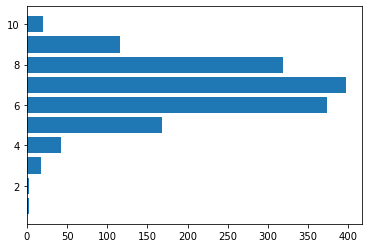

In [110]:
dfqq = df['OverallQual'].value_counts()
plt.barh(df['OverallQual'].unique(),dfqq)


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

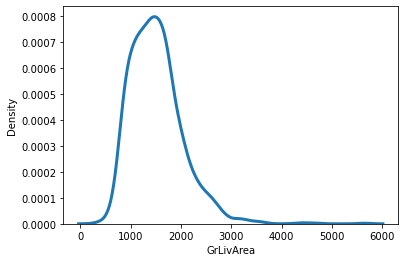

In [111]:
sns.distplot(df['GrLivArea'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})

<BarContainer object of 5 artists>

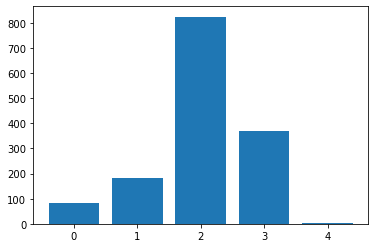

In [112]:
dfqq = df['GarageCars'].value_counts()
plt.bar(df['GarageCars'].unique(),dfqq)


Преобразуем категориальные значения. На мой взгляд, если мы хотим поисследовать данные внутри каждой конкретной группы, то проще использовать One-Hot Encoding (чтобы потом работать внутри одной группы, например, когда делим по странам). В данном случае, нам интереснее посмотреть различия цены в разных категориях, поэтому я бы использовала LabelEncoding, чтобы применить статитстику. 

    


In [113]:
obj_cols = df.select_dtypes('object').columns
df[obj_cols].nunique()


MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

Категориальные значения трудно перекодировать в числовые, так как они преимущественно являются даже не порядковыми данными, а номинативными. 

Для тех переменных, где 2 значения используем one-hot encoding, т.к. чаще всего в этих переменных одно из значений обозначает наличие признака

In [114]:
df = pd.get_dummies(df, columns=['Street'])


In [115]:
df = pd.get_dummies(df, columns=['Utilities'])
df = pd.get_dummies(df, columns=['CentralAir'])

In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['MSZoning'] = le.fit_transform(df['MSZoning'].astype(str))
df['LotShape'] = le.fit_transform(df['LotShape'].astype(str))
df['LandContour'] = le.fit_transform(df['LandContour'].astype(str))
df['LotConfig'] = le.fit_transform(df['LotConfig'].astype(str))
df['LandSlope'] = le.fit_transform(df['LandSlope'].astype(str))
df['Neighborhood'] = le.fit_transform(df['Neighborhood'].astype(str))
df['Condition1'] = le.fit_transform(df['Condition1'].astype(str))
df['Condition2'] = le.fit_transform(df['Condition2'].astype(str))
df['BldgType'] = le.fit_transform(df['BldgType'].astype(str))
df['HouseStyle'] = le.fit_transform(df['HouseStyle'].astype(str))
df['RoofStyle'] = le.fit_transform(df['RoofStyle'].astype(str))
df['RoofMatl'] = le.fit_transform(df['RoofMatl'].astype(str))
df['Exterior1st'] = le.fit_transform(df['Exterior1st'].astype(str))
df['MasVnrType'] = le.fit_transform(df['MasVnrType'].astype(str))
df['ExterQual'] = le.fit_transform(df['ExterQual'].astype(str))
df['ExterCond'] = le.fit_transform(df['ExterCond'].astype(str))
df['Foundation'] = le.fit_transform(df['Foundation'].astype(str))
df['BsmtQual'] = le.fit_transform(df['BsmtQual'].astype(str))
df['BsmtCond'] = le.fit_transform(df['BsmtCond'].astype(str))
df['BsmtExposure'] = le.fit_transform(df['BsmtExposure'].astype(str))
df['BsmtFinType1'] = le.fit_transform(df['BsmtFinType1'].astype(str))
df['BsmtFinType2'] = le.fit_transform(df['BsmtFinType2'].astype(str))
df['Heating'] = le.fit_transform(df['Heating'].astype(str))
df['HeatingQC'] = le.fit_transform(df['HeatingQC'].astype(str))
df['Electrical'] = le.fit_transform(df['Electrical'].astype(str))
df['KitchenQual'] = le.fit_transform(df['KitchenQual'].astype(str))
df['Functional'] = le.fit_transform(df['Functional'].astype(str))
df['GarageType'] = le.fit_transform(df['GarageType'].astype(str))
df['GarageFinish'] = le.fit_transform(df['GarageFinish'].astype(str))
df['GarageQual'] = le.fit_transform(df['GarageQual'].astype(str))
df['GarageCond'] = le.fit_transform(df['GarageCond'].astype(str))
df['PavedDrive'] = le.fit_transform(df['PavedDrive'].astype(str))
df['SaleType'] = le.fit_transform(df['SaleType'].astype(str))














In [117]:
df.to_csv('cleaned_house_prices.csv')